In [603]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:

# Este dataset proviene de una investigación sobre la predicción de incumplimiento de pagos de clientes en Taiwán.
# A diferencia de una simple clasificación binaria (cliente confiable/no confiable), aquí se busca estimar la probabilidad real de incumplimiento,
# lo cual es más útil para la gestión de riesgos financieros.
# se aplicarán técnicas de regresión logística y clasificación one-vs-all para predecir si un cliente caerá en default (incumplimiento).
# Aunque no estimaremos directamente la probabilidad real de default como en el estudio original, nuestro objetivo es construir un modelo predictivo
# que permita clasificar a los clientes según su riesgo de incumplimiento, utilizando las variables disponibles en el dataset.

# La entrada es de 23 elementos contando con x0
input_layer_size  = 23

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 2

# datos de entrenamiento almacenados en los arreglos X, y
df = pd.read_csv('clientes_sin_id.csv', delimiter=';')

X = df.iloc[:, :24].values
y = df.iloc[:, 23].values


m = y.size


In [605]:
print(X[0,:])
print(y)

[50000     2     2     1    37     0     0     0     0     0     0 46990
 48233 49291 28314 28959 29547  2000  2019  1200  1100  1069  1000     0]
[0 0 0 ... 1 1 1]


In [606]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [607]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [608]:
print(X_norm[0,:])
print(y)

[-0.90554988  0.81022784  0.18583787 -1.05726585  0.16422035  0.01489192
  0.11186494  0.1388451   0.18872864  0.23487902  0.25317637 -0.0575424
 -0.01335254  0.03278577 -0.23242322 -0.18677891 -0.15662825 -0.22121175
 -0.16937416 -0.22866052 -0.23786186 -0.24418454 -0.23713496 -0.53287265]
[0 0 0 ... 1 1 1]


In [609]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [610]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [611]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [612]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

<a id="section2"></a>
### 1.4 Clasificacion One-vs-all
En esta parte del ejercicio, se implementará la clasificación de uno contra todos mediante el entrenamiento de múltiples clasificadores de regresión logística regularizados, uno para cada una de las clases $K$ en nuestro conjunto de datos. En el conjunto de datos de dígitos escritos a mano, $K = 10$, pero su código debería funcionar para cualquier valor de $K$.

El argumento `y` de esta función es un vector de etiquetas de 0 a 9. Al entrenar el clasificador para la clase $k \in \{0, ..., K-1 \} $, querrá un vector K-dimensional de etiquetas $y$, donde $y_j \ in 0, 1$ indica si la instancia de entrenamiento $j ^ {th}$ pertenece a la clase $k$ $(y_j = 1)$, o si pertenece a una clase diferente $(y_j = 0)$.

Además, se utiliza `optimize.minimize` de scipy para este ejercicio.
<a id="oneVsAll"></a>

In [613]:
def OneVsAll(X, y, num_labels, lambda_):
  alpha = 0.015
  num_iters = 3000

  m, n = X.shape
  all_theta = np.zeros((num_labels, n + 1))

  # Agrega unos a la matriz X
  X = np.concatenate([np.ones((m, 1)), X], axis=1)

  for c in np.arange(num_labels):
      initial_theta = np.zeros(n + 1)

      y_actual = np.where(y == c, 1, 0)

      theta, J_history = descensoGradiente(initial_theta, X, y_actual, alpha, num_iters)

      all_theta[c] = theta
      # Grafica la convergencia del costo para cada clase
      plt.plot(np.arange(len(J_history)), J_history, lw=2)
      plt.xlabel('Numero de iteraciones')
      plt.ylabel('Costo J')
      plt.title(f'Convergencia del costo para la clase {c}')
      plt.show()


  return all_theta

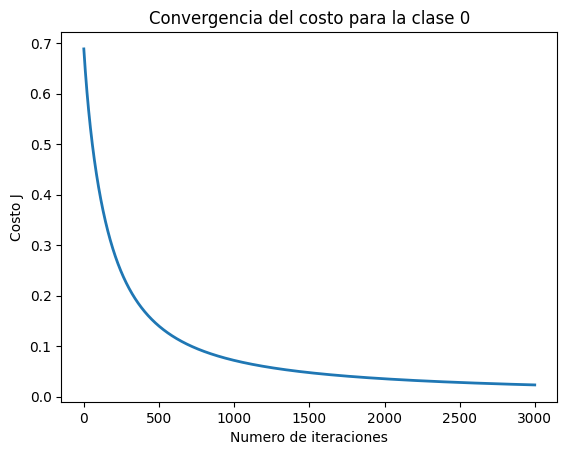

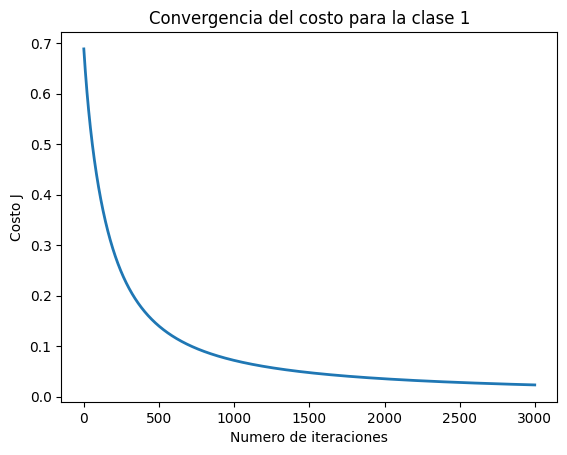

(2, 25)


In [614]:
lambda_ = 0.1
all_theta = OneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

In [615]:
print(all_theta)

[[ 2.10067101e+00  2.60219062e-02  1.63579488e-02  2.85026670e-02
   3.02266644e-02 -2.79992526e-02 -2.14107786e-01 -6.11007083e-02
  -3.15408972e-02 -1.52914053e-02 -1.44601059e-02 -9.87875197e-03
   3.36639664e-02  1.76453588e-02  1.08072364e-02  4.14907066e-03
  -1.29535662e-03 -3.85632471e-03  3.09898488e-02  2.38522181e-02
   1.16918531e-02  1.39771487e-02  1.24239568e-02  1.01488853e-02
  -3.03700860e+00]
 [-2.10067101e+00 -2.60219062e-02 -1.63579488e-02 -2.85026670e-02
  -3.02266644e-02  2.79992526e-02  2.14107786e-01  6.11007083e-02
   3.15408972e-02  1.52914053e-02  1.44601059e-02  9.87875197e-03
  -3.36639664e-02 -1.76453588e-02 -1.08072364e-02 -4.14907066e-03
   1.29535662e-03  3.85632471e-03 -3.09898488e-02 -2.38522181e-02
  -1.16918531e-02 -1.39771487e-02 -1.24239568e-02 -1.01488853e-02
   3.03700860e+00]]


<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all

Después de entrenar el clasificador de one-vs-all, se puede usarlo para predecir el dígito contenido en una imagen determinada. Para cada entrada, debe calcular la "probabilidad" de que pertenezca a cada clase utilizando los clasificadores de regresión logística entrenados. La función de predicción one-vs-all seleccionará la clase para la cual el clasificador de regresión logística correspondiente genera la probabilidad más alta y devolverá la etiqueta de clase (0, 1, ..., K-1) como la predicción para el ejemplo de entrada.

In [616]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

Una vez que haya terminado, se llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$. Debería apreciarse que la precisión del conjunto de entrenamiento es de aproximadamente 95,1% (es decir, clasifica correctamente el 95,1% de los ejemplos del conjunto de entrenamiento).

(29997, 24)
Precision del conjuto de entrenamiento: 100.00%
(5998, 24)
(5998, 25)
[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1]
Mostrando los resultados para los ultimos 100
[0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1]


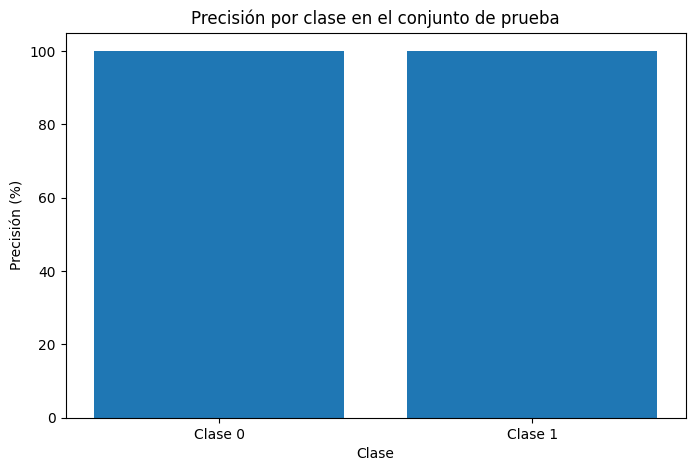

In [617]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[23999:29998, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((5998, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p[-100:])

print("Mostrando los resultados para los ultimos 100")
print(y[29898:29998])

# Calcular la precisión para cada clase
precisiones = []
for clase in range(num_labels):
    indices_clase = (y[23999:29998] == clase)
    if np.sum(indices_clase) > 0:
        precision = np.mean(p[indices_clase] == clase) * 100
    else:
        precision = np.nan
    precisiones.append(precision)

# Graficar la precisión por clase
plt.figure(figsize=(8, 5))
plt.bar(range(num_labels), precisiones, tick_label=[f'Clase {i}' for i in range(num_labels)])
plt.ylabel('Precisión (%)')
plt.xlabel('Clase')
plt.title('Precisión por clase en el conjunto de prueba')
plt.ylim(0, 105)
plt.show()

